In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [4]:
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [5]:
df.tail()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
208,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [6]:
df.shape

(213, 11)

In [7]:
df.columns

Index(['1', '1.52101', '13.64', '4.49', '1.10', '71.78', '0.06', '8.75',
       '0.00', '0.00.1', '1.1'],
      dtype='object')

In [9]:
df.dtypes

1            int64
1.52101    float64
13.64      float64
4.49       float64
1.10       float64
71.78      float64
0.06       float64
8.75       float64
0.00       float64
0.00.1     float64
1.1          int64
dtype: object

In [8]:
column_name={'1':'id','1.52101':'refractive index','13.64':'Sodium','4.49':'Magnesium','1.10':'Aluminum','71.78':'Silicon','0.06':'Potassium','8.75':'Calcium','0.00':'Barium','0.00.1':'Iron','1.1':'Type of glass' }

In [9]:
df.rename(columns=column_name, inplace=True)

In [10]:
df.columns

Index(['id', 'refractive index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon',
       'Potassium', 'Calcium', 'Barium', 'Iron', 'Type of glass'],
      dtype='object')

In [14]:
df.isnull().sum()

id                  0
refractive index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type of glass       0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                213 non-null    int64  
 1   refractive index  213 non-null    float64
 2   Sodium            213 non-null    float64
 3   Magnesium         213 non-null    float64
 4   Aluminum          213 non-null    float64
 5   Silicon           213 non-null    float64
 6   Potassium         213 non-null    float64
 7   Calcium           213 non-null    float64
 8   Barium            213 non-null    float64
 9   Iron              213 non-null    float64
 10  Type of glass     213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


<Axes: >

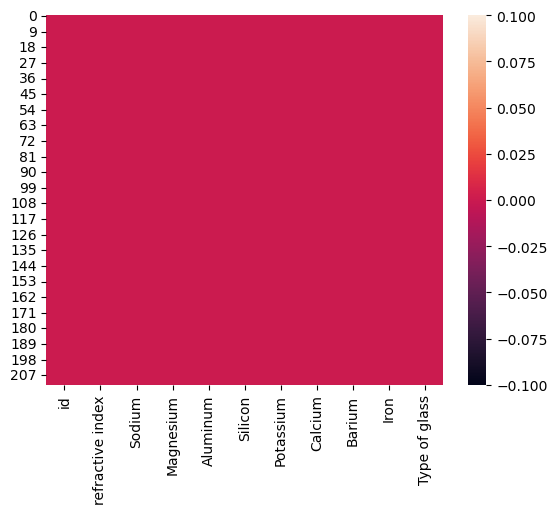

In [18]:
#Let's make a heatmap to analys null values.
sns.heatmap(df.isnull())

In [19]:
df.nunique().to_frame("Unique values")

,Unique values
id,213
refractive index,177
Sodium,142
Magnesium,93
Aluminum,117
Silicon,132
Potassium,65
Calcium,143
Barium,34
Iron,32


In [21]:
df.duplicated().sum()

0

In [22]:
df.describe()

,id,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


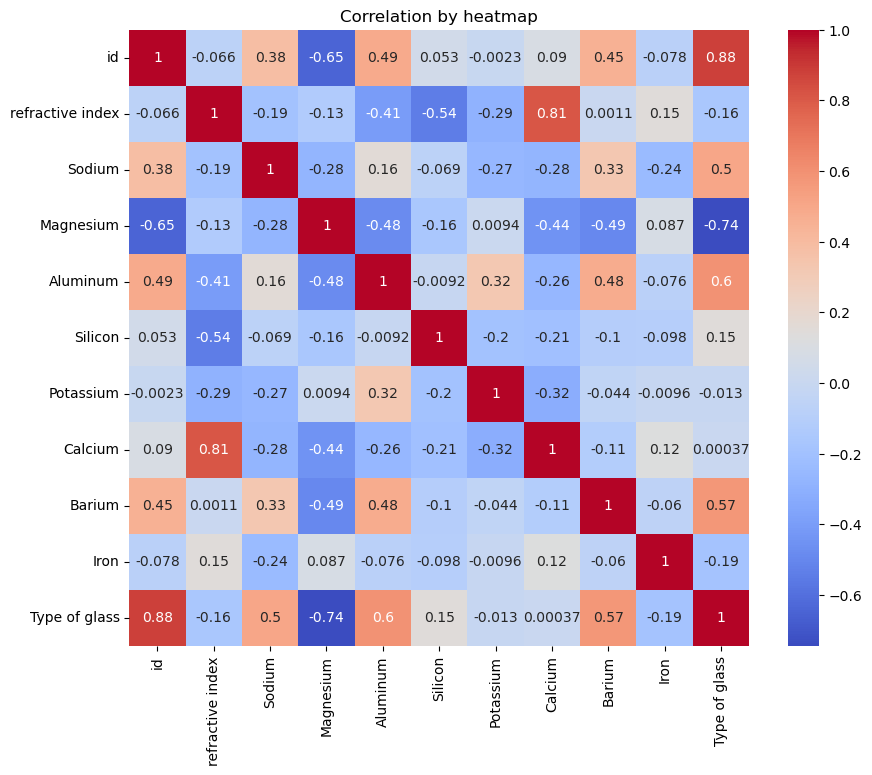

In [23]:
# let's also check corrrelation with the help of heatmap
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation by heatmap')   
plt.show()

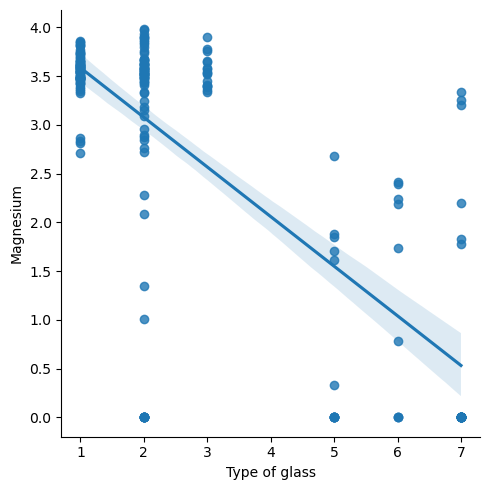

In [24]:
sns.lmplot(x='Type of glass',y='Magnesium',data=df,palette='colorblind')

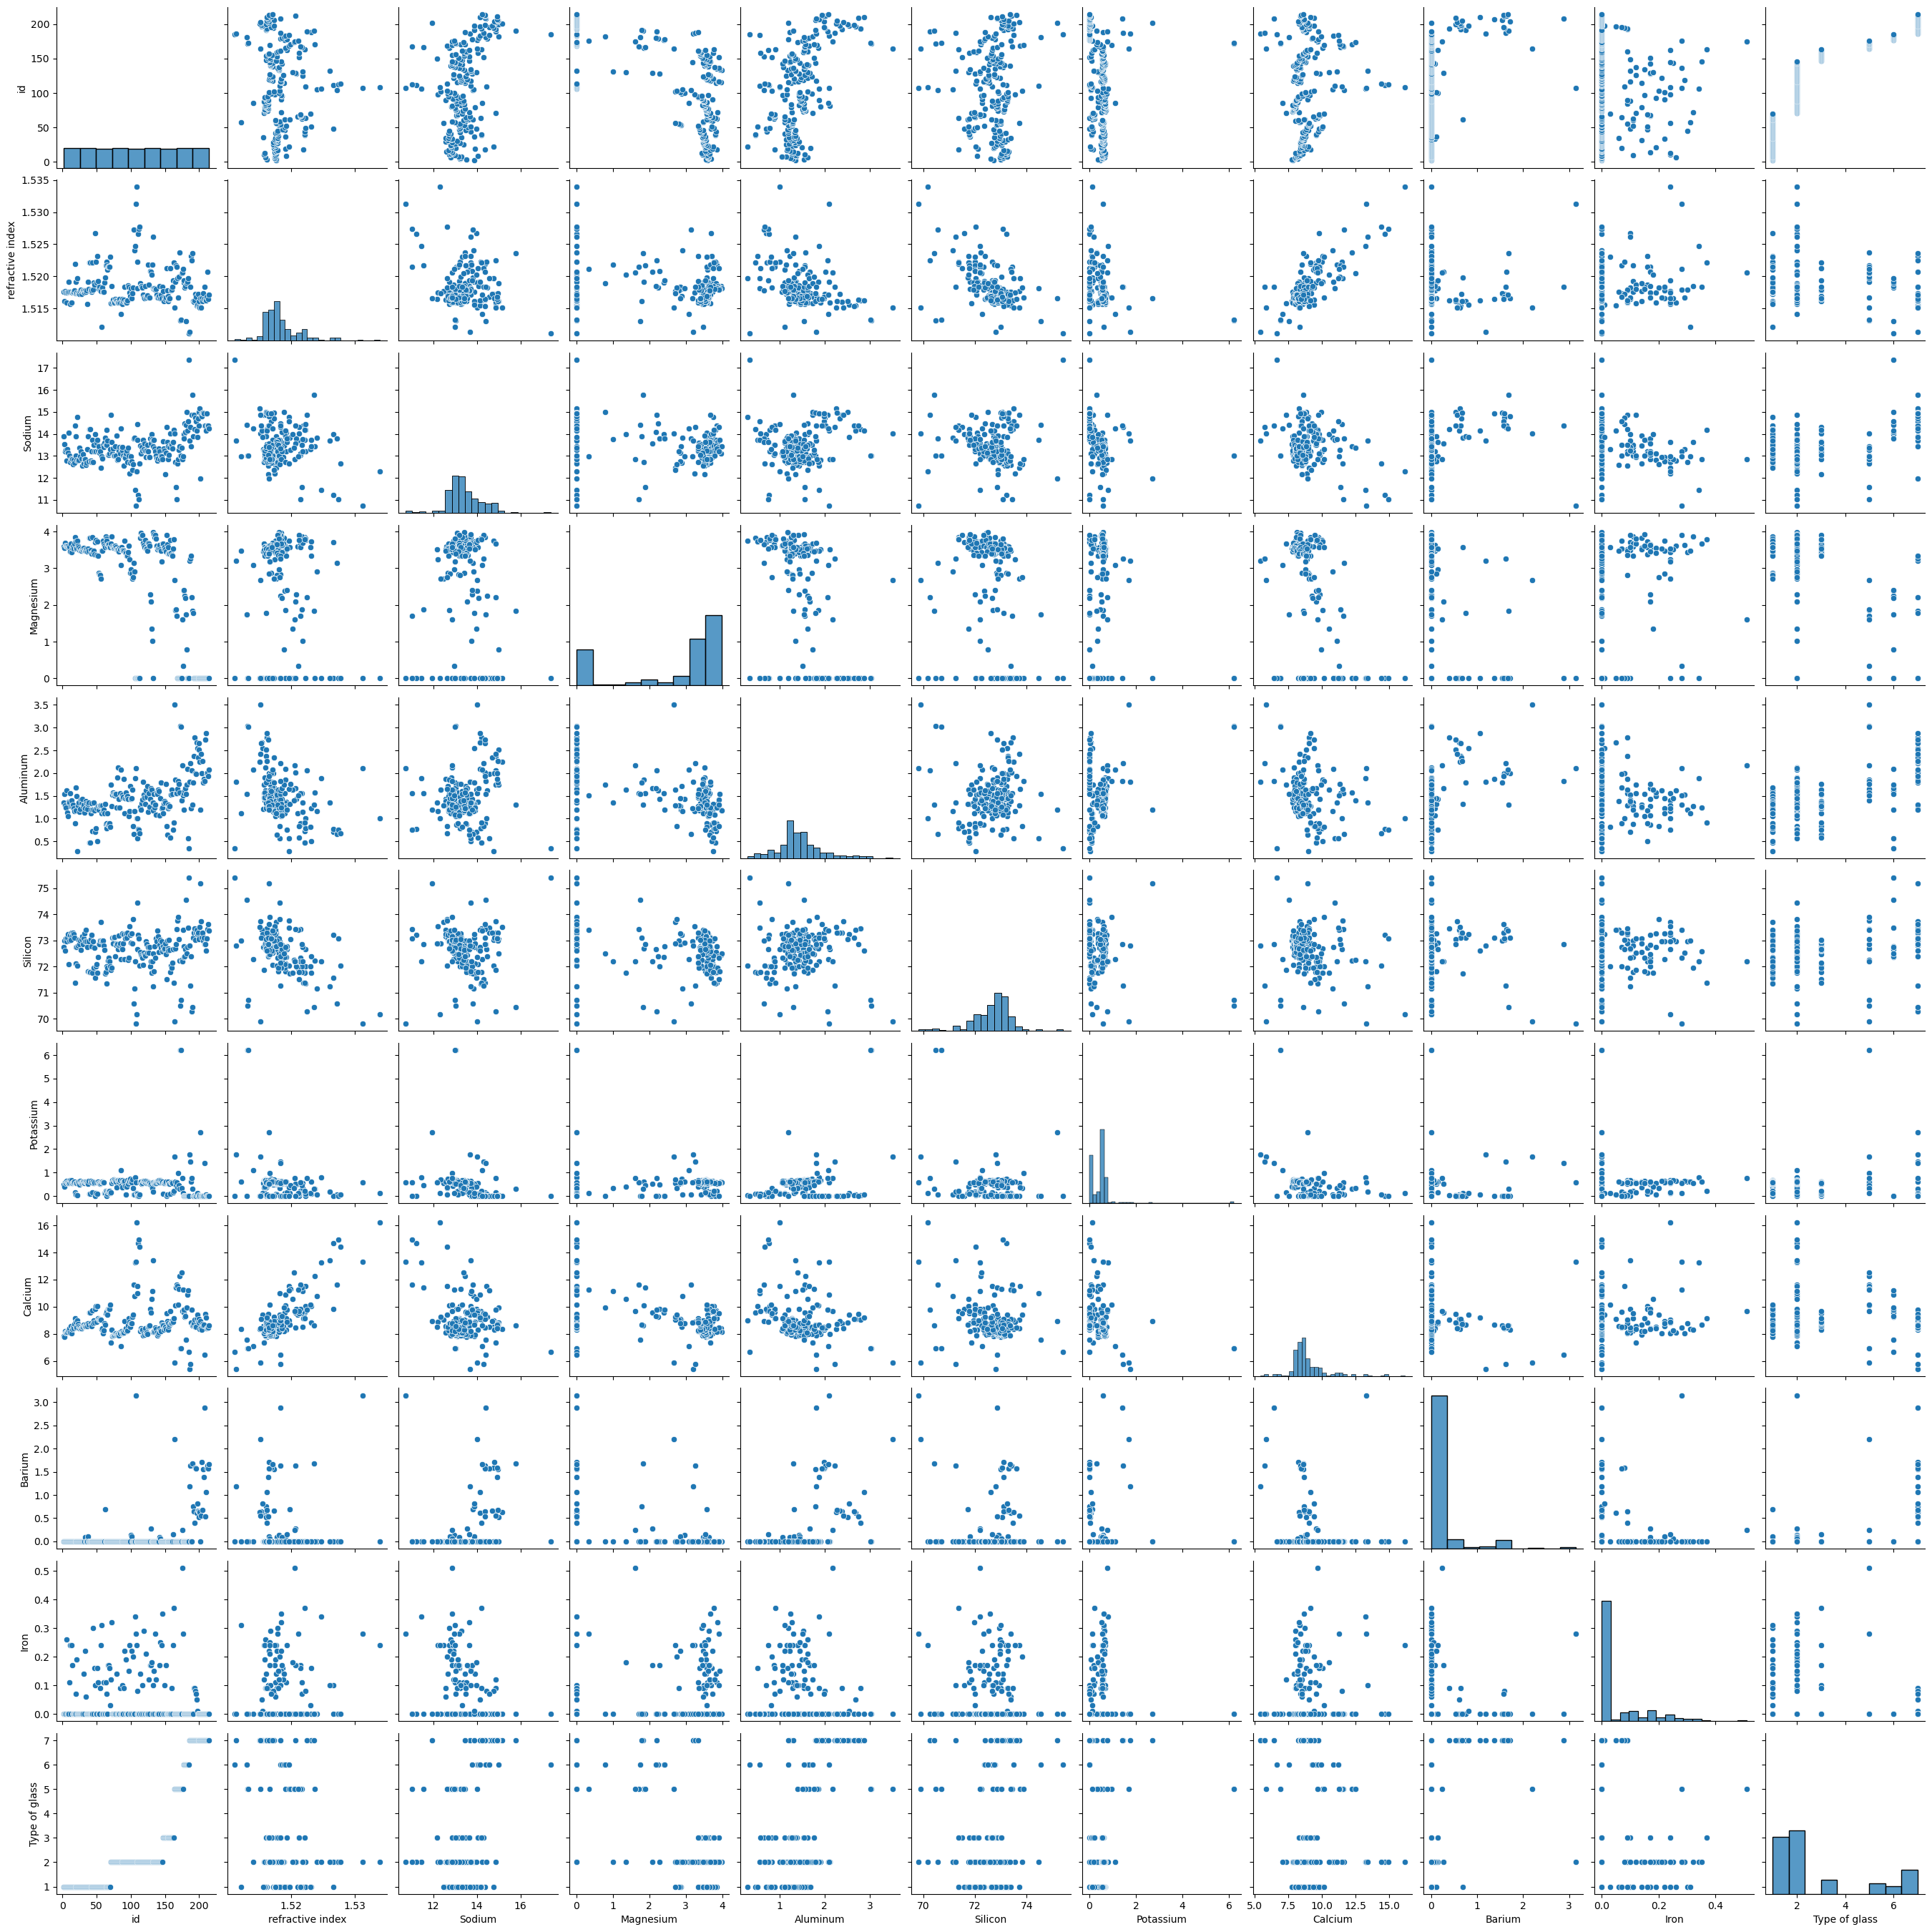

In [25]:
sns.pairplot(data=df,palette="dark1")

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(1, 0, 'id'),
  Text(2, 0, 'refractive index'),
  Text(3, 0, 'Sodium'),
  Text(4, 0, 'Magnesium'),
  Text(5, 0, 'Aluminum'),
  Text(6, 0, 'Silicon'),
  Text(7, 0, 'Potassium'),
  Text(8, 0, 'Calcium'),
  Text(9, 0, 'Barium'),
  Text(10, 0, 'Iron'),
  Text(11, 0, 'Type of glass')])

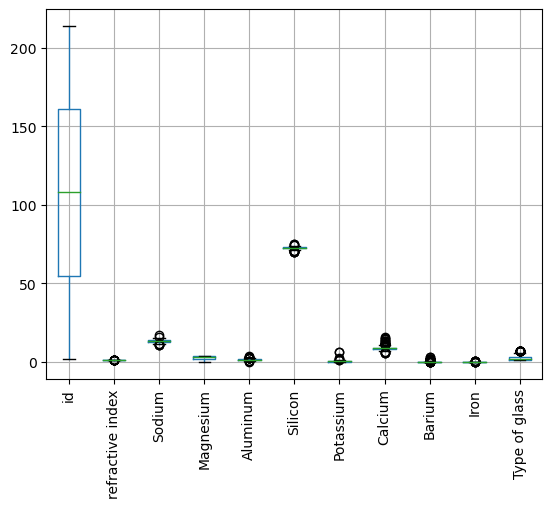

In [26]:
df.boxplot()
plt.xticks(rotation=90)

In [11]:
df.drop(columns=["id"], inplace=True)

In [31]:
#Let's find outlier with Zscore method
outliers=df[['Potassium','Calcium','Barium','Sodium']]
z=np.abs(zscore(outliers))
z

,Potassium,Calcium,Barium,Sodium
0,0.029329,0.792599,0.353808,0.591880
1,0.167472,0.827734,0.353808,0.150946
2,0.108813,0.518546,0.353808,0.240996
3,0.078115,0.623951,0.353808,0.167507
4,0.216258,0.623951,0.353808,0.755419
...,...,...,...,...
208,0.643296,0.156046,1.778672,0.898085
209,0.766090,0.392060,2.844912,1.853443
210,0.766090,0.363952,2.945501,1.167545
211,0.766090,0.335844,2.804676,1.192041


In [32]:
np.where(z>3)

(array([104, 105, 105, 105, 106, 109, 110, 111, 130, 162, 170, 171, 183,
        188, 200, 202, 206, 212], dtype=int64),
 array([1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 0, 0, 3, 2, 0, 2, 2, 2], dtype=int64))

In [33]:
df1=df[(z<3).all(axis=1)]

In [34]:
df1.shape

(197, 10)

In [35]:
df1.skew()

refractive index     0.918502
Sodium               0.385400
Magnesium           -1.210267
Aluminum             0.632215
Silicon             -0.654110
Potassium            0.273486
Calcium              1.047421
Barium               3.209568
Iron                 1.762348
catagorized glass    1.240997
dtype: float64

In [37]:
#Let's use cuberot methos to remove ouliers
df1['Barium']=np.cbrt(df1['Barium'])
df1['Magnesium']=np.cbrt(df1['Magnesium'])
df1['Iron']=np.cbrt(df1['Iron'])
df1['Calcium']=np.cbrt(df1['Calcium'])
df1['catagorized glass']=np.cbrt(df1['catagorized glass'])

In [38]:
df1.skew()

refractive index     0.918502
Sodium               0.385400
Magnesium           -2.006285
Aluminum             0.632215
Silicon             -0.654110
Potassium            0.273486
Calcium              0.404026
Barium               1.896512
Iron                 0.724874
catagorized glass    0.812368
dtype: float64

In [19]:
from scipy.stats import yeojohnson
from scipy.stats import boxcox

In [20]:
column_name = 'Magnesium'
df1['Magnesium'], _ = yeojohnson(df['Magnesium'])

In [41]:
df1.skew()

refractive index     0.918502
Sodium               0.385400
Aluminum             0.632215
Silicon             -0.654110
Potassium            0.273486
Calcium              0.404026
Iron                 0.724874
catagorized glass    0.812368
dtype: float64

In [ ]:
Let's 

In [39]:
df1.drop(columns=['Barium','Magnesium'], inplace= True)

In [53]:
df1['catagorized glass'] = df1['catagorized glass'] % 7
df1['catagorized glass'] = df1['catagorized glass'].apply(lambda x: 1 if x > 4 else 0)


In [55]:
# As now our data is ready to work let's divide it into dependent and target variable.
features = ['refractive index', 'Sodium','Aluminum', 'Silicon','Potassium', 'Calcium','Iron']
target = 'catagorized glass'

In [56]:
x = df1[features]
y = df1[target]

In [57]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (197, 7)
dimension of dependent variable: (197,)


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu= 0
mxRS=0
for i in range (1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred=RFR.predict(x_test)
    acc= accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu= acc
        maxRS = i
print("Max accuracy is :" , maxAccu, "at random_state:", maxRS)

Max accuracy is : 1.0 at random_state: 1


In [61]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = maxRS)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, accuracy_score

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict (x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

1.0
[[60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [64]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict (x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

1.0
[[60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [66]:
from sklearn.ensemble import AdaBoostClassifier
abc= AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc=abc.predict (x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

1.0
[[60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [67]:
from sklearn.ensemble import BaggingClassifier
bc= BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict (x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

1.0
[[60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [68]:
from sklearn.model_selection import cross_val_score

In [70]:
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predrfc)-score.mean()*100))

[1. 1. 1. 1. 1.]
1.0
Difference between Accuracy score and cross validation score is : -99.0


In [71]:
score = cross_val_score(abc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predabc)-score.mean()*100))

[1. 1. 1. 1. 1.]
1.0
Difference between Accuracy score and cross validation score is : -99.0


In [72]:
score = cross_val_score(bc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predbc)-score.mean()*100))

[1. 1. 1. 1. 1.]
1.0
Difference between Accuracy score and cross validation score is : -99.0


In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
parameters={'creiterion' : ['gini','entropy'],
           'random_state':[10,50,1000],
           'max_depth':[0,10,20],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,200,300]}

In [78]:
GCV=GridSearchCV(AdaBoostClassifier(),parameters,cv=5)

In [79]:
GCV.fit(x_train,y_train)

ValueError: Invalid parameter 'creiterion' for estimator AdaBoostClassifier(). Valid parameters are: ['algorithm', 'base_estimator', 'estimator', 'learning_rate', 'n_estimators', 'random_state'].

In [80]:
import pickle
filename='Titanic.pkl'
pickle.dump(bc,open(filename,'wb'))

In [81]:
Load_model=pickle.load(open('Titanic.pkl','rb'))
result=Load_model.score(x_test,y_test)
print(result*100)

100.0
